In [1]:
import matplotlib.pyplot as plt
from pandas import read_excel
from network import NeuralNetwork
from sklearn.preprocessing import minmax_scale

In [2]:
best = [0.5, 0.7]
worst = [0.001, 0.4]



In [3]:
df = read_excel('HW3train.xlsx')
x0 = minmax_scale(df['X_0'].tolist())
x1 = minmax_scale(df['X_1'].tolist())
y = df['y'].tolist()
training_sets = []
for i in range(len(x0)):
    training_sets.append([[x0[i],x1[i]],[y[i]]])
    
df = read_excel('HW3validate.xlsx')
x0 = minmax_scale(df['X_0'].tolist())
x1 = minmax_scale(df['X_1'].tolist())
y = df['y'].tolist()
validation_sets = []
for i in range(len(x0)):
    validation_sets.append([[x0[i],x1[i]],[y[i]]])

In [4]:
import math

y_train = []
y_eval = []
x_epochs = []


nn = NeuralNetwork(2, 10, 10, 1, std = best[1], learning_rate = best[0])

prev_error = 2
error = 1
iteration = 0
epochs = 0
BATCH_SIZE = 32


activations1 = []
activations2 = []
activations3 = []


to_print = True
while epochs < 35:
    nn.train(training_sets[BATCH_SIZE*iteration:BATCH_SIZE+BATCH_SIZE*iteration])
    
    
    if epochs == 0 or epochs == 18 or epochs == 34:
        for i in range(len(validation_sets)):
            if to_print:
                if epochs == 0:
                    activations1.append(nn.get_outputs(validation_sets[i][0]))
                elif epochs == 18:
                    activations2.append(nn.get_outputs(validation_sets[i][0]))
                elif epochs == 34:
                    activations3.append(nn.get_outputs(validation_sets[i][0]))
        to_print = False
    else:
        to_print = True
    
    y_train.append(nn.calculate_total_error(training_sets))
    y_eval.append(nn.calculate_total_error(validation_sets))
    x_epochs.append(epochs)
    
    if nn.calculate_total_error(training_sets) < 0.15:
        break
    iteration += 1
    if iteration % (math.ceil(len(training_sets) / BATCH_SIZE)) == 0:
        iteration = 0
        epochs += 1
nn.undo()

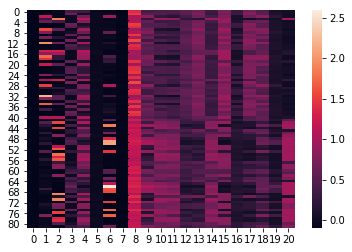

In [5]:
import seaborn as sns

# neuron_id = ['1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '1.10', '2.1', '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '2.10', 'output']

# dataid = [i for i in range(len(validation_sets))]
# plt.clf()
sns.heatmap(activations3)
